# Why quaternion can represent 3D coordinate rotation?

### 为什么四个数字就可以表示坐标系旋转

1. 平面中，二维坐标系的旋转需要两个参数表示：$cos(\theta{_x})$和$sin(\theta{_x})$，因此8个卦限中仅剩两个卦限，这确定了X轴的旋转
2. 由于仅剩两个卦限，只需要再用一个参数就可确定Y轴的旋转：$sin(\theta{_y})$
3. 由于其中两个轴已经确定，剩下的一根Z轴的方向也可确定下来（左手或右手坐标系），即排除其中四个卦限，只需再用一个参数来确定其旋转角度$\theta{_z}$，至此确定所有轴的旋转分量

### 实际中四元数的计算

$$ q = cos (\frac{a}{2}) + i(x * sin(\frac{a}{2})) + j(y * sin(\frac{a}{2})) + k(z * sin(\frac{a}{2})) $$

其中$a$表示旋转角度（单位°），$(x,y,z)$表示旋转轴（0-1）

In [1]:
# 例子：a=60°，旋转轴为z轴
# q.w=cos(60°/2) = 0.866
# q.x=RAix.x*sin(60°/2) = 0*0.5=0
# q.y=RAix.y*sin(60°/2) = 0*0.5=0
# q.z=RAix.z*sin(60°/2) = 1*0.5=0.5

In [2]:
# 这是nuscenes中的一个相机传感器（相对于车体旋转）的四元数
# [w, x, y, z]
q = [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755] # 

### 二维坐标和坐标系转换

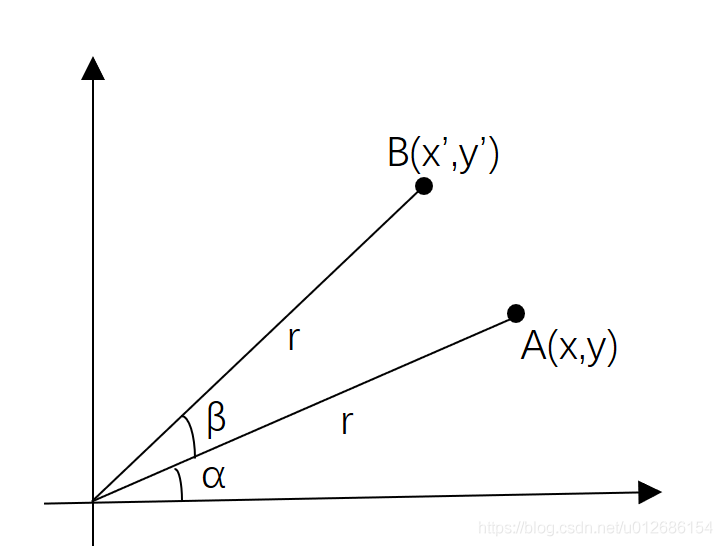

In [3]:
import numpy as np

beta = 30 / 180 * np.pi

# 坐标点的旋转矩阵
r2d = np.array([
    [np.cos(beta), -np.sin(beta)],
    [np.sin(beta), np.cos(beta)],
])
r2d

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [4]:
# 坐标系的旋转矩阵 点旋转beta相当于坐标系旋转-beta
r2d_sys = np.array([
    [np.cos(-beta), np.sin(-beta)],
    [-np.sin(-beta), np.cos(-beta)],
])
r2d_sys

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [5]:
pA = np.array([2,1])
np.matmul(r2d_sys, pA)

array([1.23205081, 1.8660254 ])

In [9]:
import math

def my_r2d(x, y, beta):
    # 坐标点的旋转公式
    # beta: 弧度
    l = math.sqrt(x**2+y**2)
    x_ = l * math.cos(math.acos(x / l) + beta)
    y_ = l * math.sin(math.acos(x / l) + beta)
    
    return x_, y_

In [10]:
pA = np.array([2,1])
np.matmul(r2d, pA)

array([1.23205081, 1.8660254 ])

In [11]:
# 自己写的转换公式
my_r2d(float(pA[0]),float(pA[1]) , beta)

(1.2320508075688774, 1.8660254037844386)

2D坐标旋转结论：坐标点和坐标系旋转角度数值相反，但效果相同，均可以用(2,2)的矩阵来进行坐标点转换。

### 先明确坐标系

车体坐标系(nuScenes)：ISO标准为：X向前， Y向左， Z向上，这属于右手坐标系（大拇指为X轴，食指为Y轴，中指为Z轴）

相机坐标系：z轴垂直镜头向前, x轴向右， y轴向下，这也属于右手坐标系

LiDAR坐标系：z轴向上，x轴向右，y轴向前。

### 坐标系旋转方向定义

正方向顶端按X—>Y—>Z—>X的顺序进行指向的方向一致

绕X轴正方向旋转: 从+Y到+Z方向旋转。右手坐标系时是逆时针，左手坐标系时是顺时针。

绕Y轴正方向旋转: 从+Z到+X方向旋转。右手坐标系时是顺时针，左手坐标系时是逆时针。

绕Z轴正方向旋转: 从+X到+Y方向旋转。右手坐标系时是逆时针，左手坐标系时是逆时针。

### nuScenes坐标图示
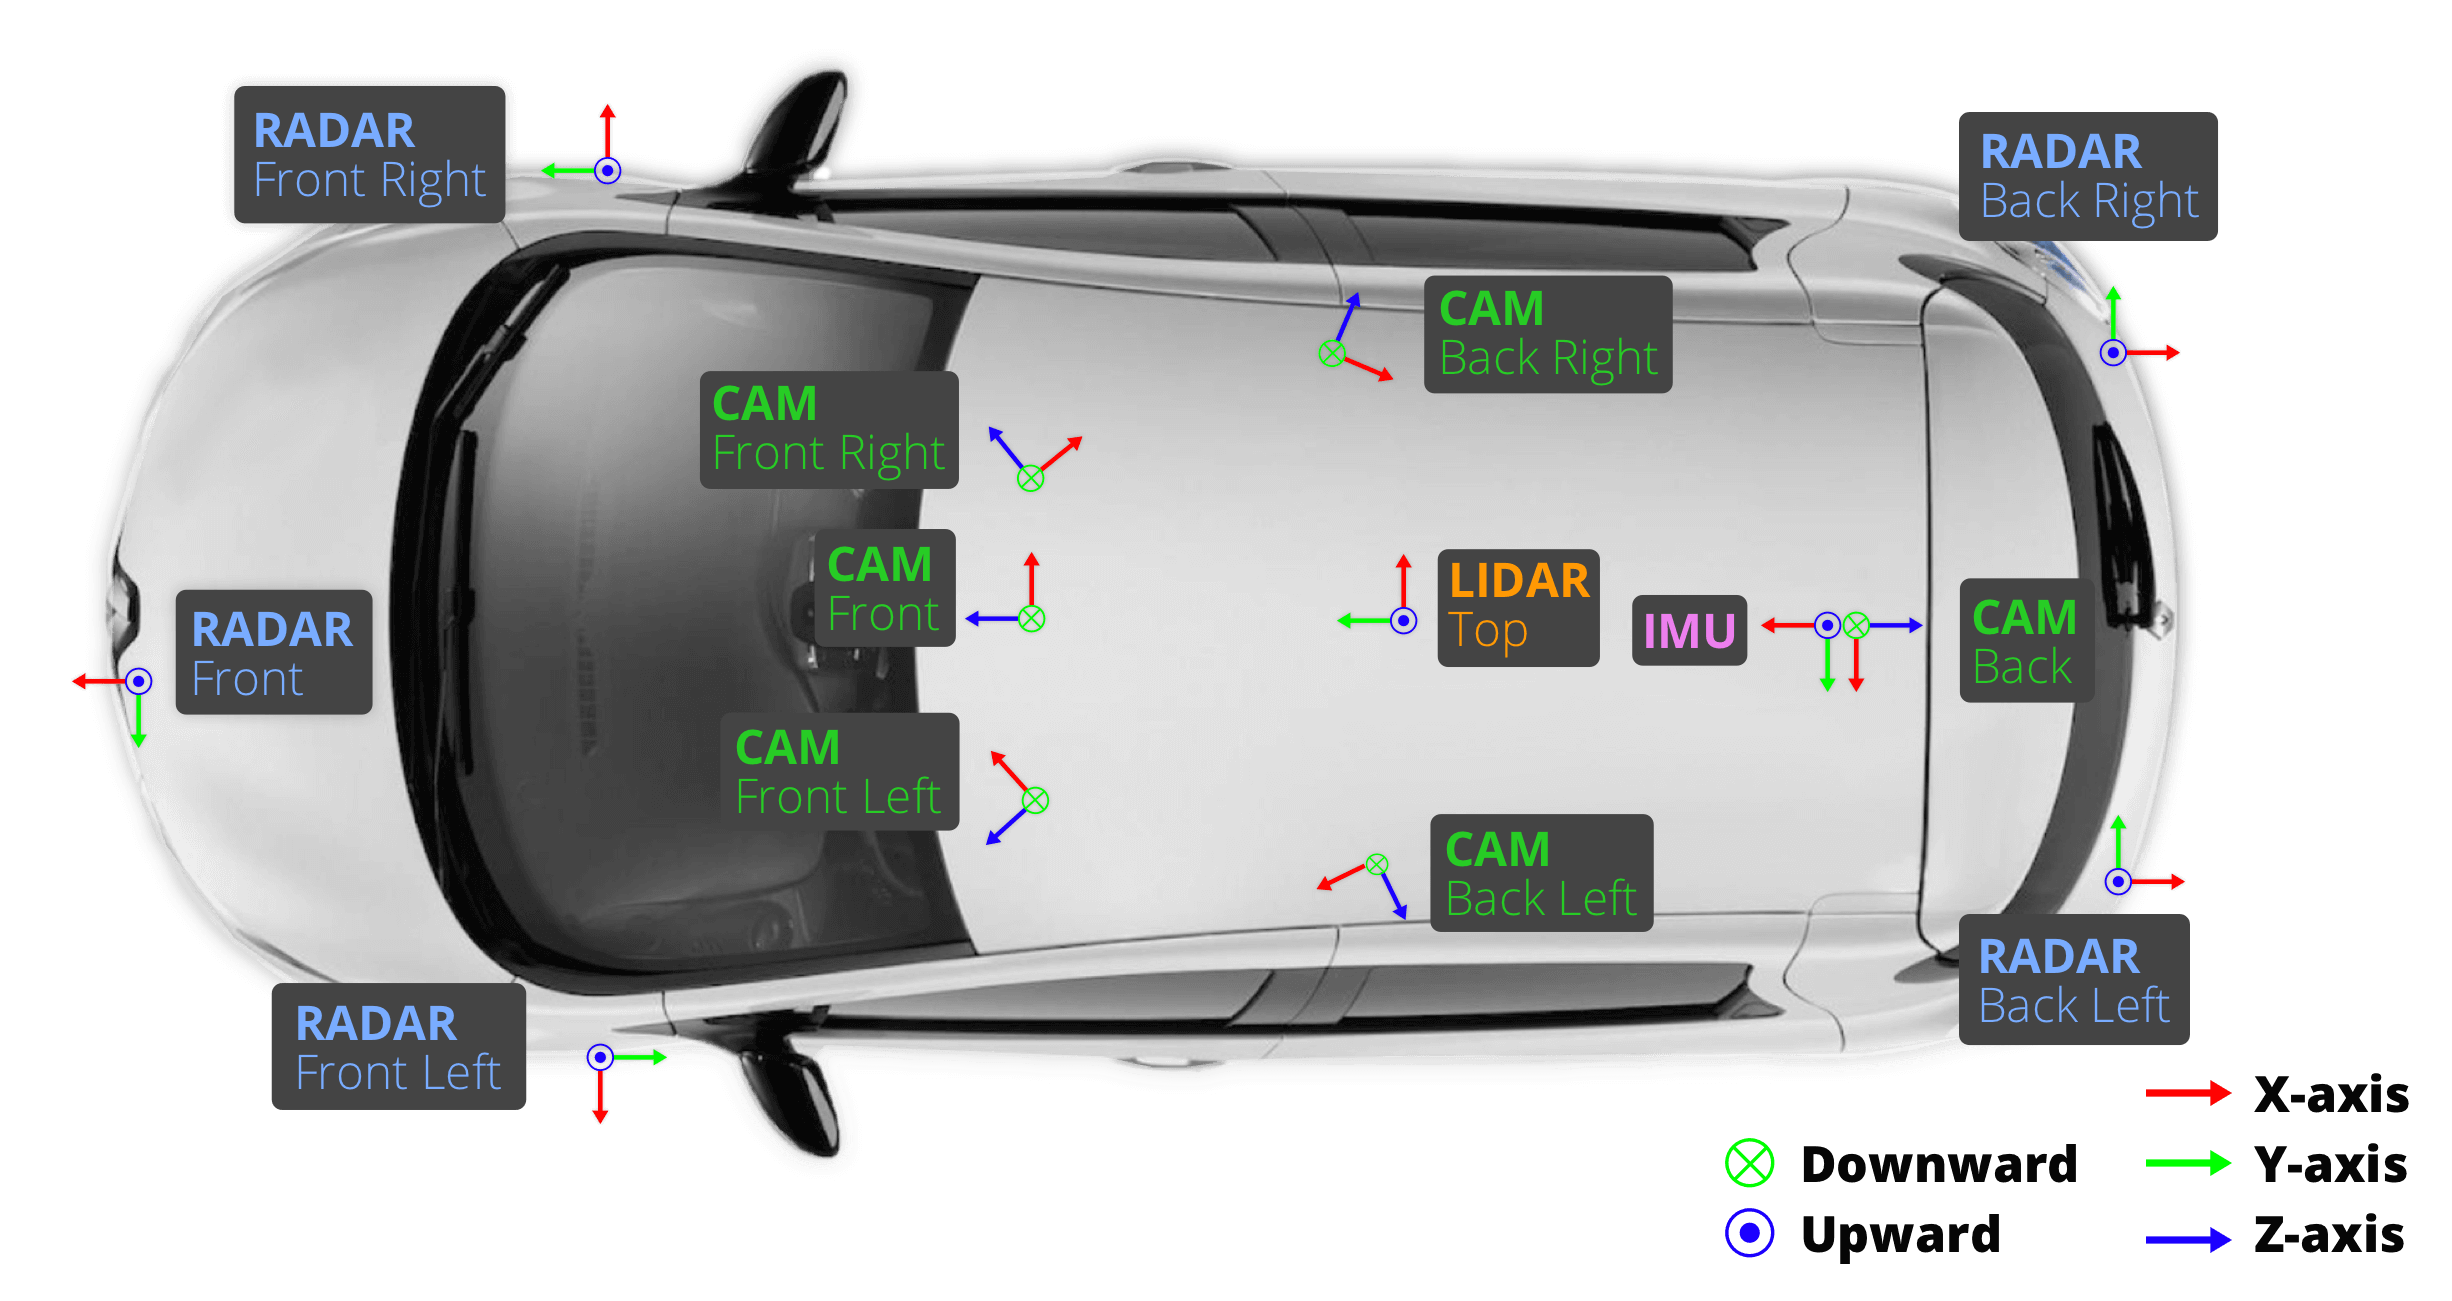

### 欧拉角->四元数

滚转roll、俯仰pitch、偏航yaw分别是$\alpha,\beta,\gamma$，则有：
$$x=sin(\beta/2)sin(\gamma/2)cos(\alpha/2)+cos(\beta/2)cos(\gamma/2)sin(\alpha/2)$$

### 四元数->欧拉角

In [12]:
Q_CAM_BACK_LEFT = [0.6924185592174665, -0.7031619420114925, -0.11648342771943819, 0.11203317912370753]
Q_CAM_BACK_RIGHT = [0.12280980120078765, -0.132400842670559, -0.7004305821388234, 0.690496031265798]
Q_CAM_FRONT_LEFT = [0.6757265034669446, -0.6736266522251881, 0.21214015046209478, -0.21122827103904068]
Q_CAM_BACK = [0.5037872666382278, -0.49740249788611096, -0.4941850223835201, 0.5045496097725578]
Q_CAM_FRONT_RIGHT = [0.2060347966337182, -0.2026940577919598, 0.6824507824531167, -0.6713610884174485]
Q_CAM_FRONT = [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
Q_LIDAR_TOP = [0.7077955119163518, -0.006492242056004365, 0.010646214713995808, -0.7063073142877817]

Qs = {
    'Q_CAM_BACK_LEFT': Q_CAM_BACK_LEFT, 
    'Q_CAM_BACK_RIGHT': Q_CAM_BACK_RIGHT,
    'Q_CAM_FRONT_LEFT': Q_CAM_FRONT_LEFT, 
    'Q_CAM_BACK': Q_CAM_BACK, 
    'Q_CAM_FRONT_RIGHT': Q_CAM_FRONT_RIGHT, 
    'Q_CAM_FRONT': Q_CAM_FRONT,
    'Q_LIDAR_TOP': Q_LIDAR_TOP,
}

In [13]:
import math

for cam in Qs:
    print(cam, math.acos(Qs[cam][-1]) *2 / math.pi * 180)  # 

Q_CAM_BACK_LEFT 167.13493451011715
Q_CAM_BACK_RIGHT 92.66122624908238
Q_CAM_FRONT_LEFT 204.38868354817603
Q_CAM_BACK 119.39708195867524
Q_CAM_FRONT_RIGHT 264.3444027326796
Q_CAM_FRONT 239.65241593593592
Q_LIDAR_TOP 269.87051397389166


In [14]:
def my_quat_to_euler(q):
    # q: x,y,z,w
    a = math.acos(q[-1]) * 2  # 弧度
    bx = math.acos(q[0] / math.sin(a/2)) / math.pi * 180
    by = math.acos(q[1] / math.sin(a/2)) / math.pi * 180
    bz = math.acos(q[2] / math.sin(a/2)) / math.pi * 180
    
    return bx, by, bz

In [15]:
for cam in Qs:
    print(cam, my_quat_to_euler(Qs[cam]))

Q_CAM_BACK_LEFT (45.82874694093258, 135.0413382905578, 96.73176858864109)
Q_CAM_BACK_RIGHT (80.22482853331464, 100.54699337095448, 165.54256906628294)
Q_CAM_FRONT_LEFT (46.2649112378843, 133.5649738205866, 77.46492635903039)
Q_CAM_BACK (54.30262487037303, 125.17732932811694, 124.91652207342374)
Q_CAM_FRONT_RIGHT (73.85908173349277, 105.87223316852615, 22.953134050834294)
Q_CAM_FRONT (54.822257077915076, 125.43915690552939, 54.82401299275446)
Q_LIDAR_TOP (1.0093055532088744, 90.52547037044923, 89.13829416467946)


In [18]:
from pyquaternion import Quaternion

quaternion = Quaternion(Q_CAM_BACK).inverse
quaternion.rotation_matrix
# orientation = quaternion * orientation

array([[ 0.00242171,  0.99998907, -0.00400023],
       [-0.01675361, -0.00395911, -0.99985181],
       [-0.99985672,  0.00248837,  0.01674384]])

In [19]:
# 通过旋转矩阵获取旋转向量
import cv2

src = quaternion.rotation_matrix
dst, jacobian = cv2.Rodrigues(src)
dst, jacobian

(array([[ 1.20093548],
        [ 1.19316716],
        [-1.21819156]]),
 array([[-0.72108341, -0.71641904,  0.73144456],
        [ 0.        ,  0.        , -1.19813163],
        [ 0.        ,  1.19813163,  0.        ],
        [ 0.        ,  0.        ,  1.19813163],
        [-0.72108341, -0.71641904,  0.73144456],
        [-1.19813163,  0.        ,  0.        ],
        [ 0.        , -1.19813163,  0.        ],
        [ 1.19813163,  0.        ,  0.        ],
        [-0.72108341, -0.71641904,  0.73144456]]))

In [58]:
for cam in Qs:
    quaternion = Quaternion(Qs[cam])#.inverse
    dst, jacobian = cv2.Rodrigues(quaternion.rotation_matrix)
    print(cam)
    angle_all = 0
    print(dst)
#     for i in dst:
#         angle_all += math.sqrt(i**2) #**2
    
    N = math.sqrt(dst[0]**2 + dst[1]**2 + dst[2]**2)
    print('模长：', N)
        
# #     angle_all_degree = math.sqrt(angle_all) / 3.1416 * 180
#     angle_all_degree = angle_all / 3.1416 * 180

    
    print('复合旋转角度：', N / 3.1416 * 180)
#     angle_x = math.sqrt(dst[0]**2 /  angle_all**2) / 3.1416 * 180
#     angle_y = math.sqrt(dst[1]**2 /  angle_all**2) / 3.1416 * 180
#     angle_z = math.sqrt(dst[2]**2 /  angle_all**2) / 3.1416 * 180
#     angle_x = (dst[0]**2 /  angle_all**2) / 3.1416 * 180
#     angle_y = (dst[1]**2 /  angle_all**2) / 3.1416 * 180
#     angle_z = (dst[2]**2 /  angle_all**2) / 3.1416 * 180
#     angle_x = dst[0]**2 /  angle_all / 3.1416 * 180
#     angle_y = dst[1]**2 /  angle_all / 3.1416 * 180
#     angle_z = dst[2]**2 /  angle_all / 3.1416 * 180
#     angle_x = math.atan(dst[0]**2 / (dst[1]**2 + dst[2]**2)  / 3.1416 * 180
#     angle_y = math.atan(dst[1] / dst[0])  / 3.1416 * 180
#     angle_z = math.atan(dst[0] / dst[1])  / 3.1416 * 180
#     angle_y = dst[1] /  angle_all / 3.1416 * 180
#     angle_z = dst[2] /  angle_all / 3.1416 * 180
#     angle_x = dst[0]  / 3.1416 * 180
#     angle_y = dst[1]  / 3.1416 * 180
#     angle_z = dst[2]  / 3.1416 * 180
#     angle_x = math.atan(dst[0] / math.sqrt(dst[1]**2 + dst[2]**2))  / 3.1416 * 180
#     angle_y = math.atan(dst[1] / math.sqrt(dst[0]**2 + dst[2]**2))  / 3.1416 * 180
#     angle_z = math.atan(dst[2] / math.sqrt(dst[0]**2 + dst[1]**2))  / 3.1416 * 180 

#     angle_x = math.atan(dst[0] / math.sqrt(dst[1]**2 + dst[2]**2))  / 3.1416 * 180
#     angle_y = math.atan(dst[1] / math.sqrt(dst[0]**2 + dst[2]**2))  / 3.1416 * 180
#     angle_z = math.atan(dst[2] / math.sqrt(dst[0]**2 + dst[1]**2))  / 3.1416 * 180 

#     angle_x = math.atan(dst[0] / dst[1])*2   / 3.1416 * 180
#     angle_y = math.atan(dst[1] / dst[0])*2  / 3.1416 * 180
#     angle_z = math.atan(dst[0] / dst[1])  / 3.1416 * 180

#     angle_x = math.asin(dst[0] /  N) / 3.1416 * 180
#     angle_y = math.asin(dst[1] /  N) / 3.1416 * 180
#     angle_z = math.asin(dst[2] /  N) / 3.1416 * 180

    angle_x = (dst[0]) / 3.1416 * 180
    angle_y = (dst[1]) / 3.1416 * 180
    angle_z = (dst[2]) / 3.1416 * 180
    
    print('x旋转角度：', angle_x)
    print('y旋转角度：', angle_y)
    print('z旋转角度：', angle_z)
    
    print('--')
    print('y分解后x的总分量：', ((((dst[1]**2 * (dst[0]**2/(dst[0]**2+dst[2]**2))) + dst[0]**2) / N**2) * N) / 3.1416 * 180)
    
    print('=======================')
    
    
#     x = 
#     y = 
#     z = 
#     print([for i in dst])
# #     print([i/3.1416 * 180 for i in dst])

Q_CAM_BACK_LEFT
[[-1.5709601 ]
 [-0.26023993]
 [ 0.25029747]]
模长： 1.6119209954533957
复合旋转角度： 92.35605397937714
x旋转角度： [-90.00917327]
y旋转角度： [-14.91061504]
z旋转角度： [14.34095509]
--
y分解后x的总分量： [90.06960834]
Q_CAM_BACK_RIGHT
[[-0.38627095]
 [-2.04346121]
 [ 2.0144778 ]]
模长： 2.895351406839683
复合旋转角度： 165.8910278937939
x旋转角度： [-22.13164343]
y旋转角度： [-117.08142924]
z旋转角度： [115.42080584]
--
y分解后x的总分量： [5.88302677]
Q_CAM_FRONT_LEFT
[[-1.5148376 ]
 [ 0.47705636]
 [-0.47500574]]
模长： 1.6576930305773376
复合旋转角度： 94.97859227906825
x旋转角度： [-86.79359829]
y旋转角度： [27.33325194]
z旋转角度： [-27.21576061]
--
y分解后x的总分量： [86.47582525]
Q_CAM_BACK
[[-1.20093548]
 [-1.19316716]
 [ 1.21819156]]
模长： 2.08563768719113
复合旋转角度： 119.49795763127177
x旋转角度： [-68.8083733]
y旋转角度： [-68.36328254]
z旋转角度： [69.79707188]
--
y分解后x的总分量： [58.89662089]
Q_CAM_FRONT_RIGHT
[[-0.56477298]
 [ 1.90153458]
 [-1.87063501]]
模长： 2.7265505034063784
复合旋转角度： 156.21947116537692
x旋转角度： [-32.35903238]
y旋转角度： [108.94965154]
z旋转角度： [-107.17924064]
--
y分解后x

#### 结论：根据 cv2.Rodrigues 求出的向量模长为刚体绕特殊的一个轴一次旋转完成所需的弧度。

In [ ]:
for cam in Qs:
    print(cam, Quaternion(Qs[cam]).inverse.rotation_matrix)

In [ ]:
import math


def quart_to_rpy(x, y, z, w):
    roll = math.atan2(2 * (w * x + y * z), 1 - 2 * (x * x + y * y)) / math.pi * 180
    pitch = math.asin(2 * (w * y - x * z)) / math.pi * 180
    yaw = math.atan2(2 * (w * z + x * y), 1 - 2 * (z * z + y * y)) / math.pi * 180
    return roll, pitch, yaw

In [ ]:
for cam in Qs:
    # 车体坐标系x向后
    # 以下操作按车体轴旋转
    # -z轴旋转，逆时针为正； -y； -x，仰天为负。！！！！！！！！！！！！！！！！
    print(cam, quart_to_rpy(*Qs[cam])) # Qs[cam][1], Qs[cam][2], Qs[cam][3], Qs[cam][0])

In [ ]:
# import tf
# (r, p, y) = tf.transformations.euler_from_quaternion([q[1], q[2], q[3], q[0]])
from scipy.spatial.transform import Rotation as R
import numpy as np

def quaternion2euler(quaternion):
    r = R.from_quat(quaternion)  # quaternion is (x,y,z,w)
    euler = r.as_euler('xyz', degrees=True)
    return euler

def euler2quaternion(euler):
    r = R.from_euler('xyz', euler, degrees=True)
    quaternion = r.as_quat()
    return quaternion

def euler2rotation(euler):
    r = R.from_euler('xyz', euler, degrees=True)
    rotation_matrix = r.as_dcm()
    return rotation_matrix

In [ ]:
# 相机坐标到车体坐标的x,y,z旋转角度（相对于相机自身的轴）
for cam in Qs:
    # 车体坐标系x向前
    # Q_LIDAR_TOP [-90   0  -1] 表示车体坐标系绕车体x轴反方向（Y->X）旋转90度成为LiDAR坐标系
    # Q_CAM_FRONT [-90   0 -90] 表示车体坐标系绕车体x轴反方向（Y->X）旋转90度，然后再绕
    print(cam, quaternion2euler(Qs[cam]).astype(np.int16))

In [ ]:
# Q_CAM_BACK_LEFT [161.39975386   0.21518276 -90.9173632 ]
# Q_CAM_BACK_RIGHT [ 20.79928449  -0.61909476 -90.93206678]
# Q_CAM_FRONT_LEFT [-145    0  -89]
# Q_CAM_BACK [ 90   0 -89]  先沿相机X轴正方向旋转90°，再沿相机Z轴反方向旋转89°
# Q_CAM_FRONT_RIGHT [-33   0 -90] 先沿相机X轴反方向旋转33°，再沿相机Z轴反方向旋转90°
# Q_CAM_FRONT [-9.03257157e+01  4.61271948e-02 -9.03232264e+01]

### 四元数转换为旋转矩阵

四元数表达了相对旋转关系，旋转矩阵用于将相机坐标转换为全局坐标

In [ ]:
from pyquaternion import Quaternion


q = [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]

rotation_matrix = Quaternion(q).rotation_matrix
rotation_matrix

In [ ]:
q_i = q[1]
q_j = q[2]
q_k = q[3]

k = q_i * q_j
k

### 欧拉角->旋转矩阵

### 旋转矩阵->欧拉角